In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
import pymc3 as pm
import theano.tensor as tt

In [3]:
import matplotlib.pyplot as plt
import arviz as az

In [4]:
mu, sigma = 3, 0.5
T = 20

x = np.random.normal(mu, sigma, T)

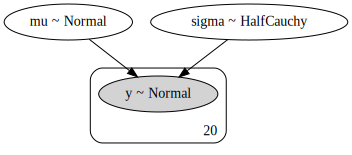

In [5]:
with pm.Model() as m:
    pm.Normal('mu', mu=0, sd=10)
    pm.HalfCauchy('sigma', beta=2)
    
    pm.Normal('y', mu=m['mu'], sd=m['sigma'], observed=x)
    
pm.model_to_graphviz(m)

In [8]:
with m:
    trace = pm.sample(draws=10000, tune=1000, chains=1, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling chain 0, 0 divergences: 100%|██████████| 11000/11000 [00:11<00:00, 991.78it/s] 
Only one chain was sampled, this makes it impossible to run some convergence checks
